In [3]:
#******** morphometric for sch_cobre*************
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
wkDir        = '/media/garlicseed/data2/Schizophrenia/COBRE/'
sbj_file     = 'participants.tsv' # subject file in BIDS
# obtaini subject name 
sbj_tsv = pd.read_table(wkDir+sbj_file)
sbj_name = sbj_tsv['participant_id']

# export the subject name 
#sbj_name.to_csv(outDir+'subject_name.csv', index=False, header=False)


ucla_dir = '/media/garlicseed/data2/Schizophrenia/ucla/Morphometrics'
cobre_dir = '/media/garlicseed/data2/Schizophrenia/COBRE/Morphometrics'
# Initialize lists to store individual metrics
SA_matrix = []
GV_matrix = []
thick_avg_matrix = []
thick_std_matrix = []
mean_curv_matrix = []
gaus_curv_matrix = []

mopho_matrix = []

for sub in tqdm_notebook(sbj_name.values):
    lh_data = pd.read_csv(f"{cobre_dir}/{sub}_lh_schaefer400_stats.txt", sep=r'\s+', comment='#', header=None,
                          names=["StructName", "NumVert", "SurfArea", "GrayVol", "ThickAvg","ThickStd","MeanCurv", "GausCurv","FoldInd", "CurvInd"])
    rh_data = pd.read_csv(f"{cobre_dir}/{sub}_rh_schaefer400_stats.txt", sep=r'\s+', comment='#', header=None,
                          names=["StructName", "NumVert", "SurfArea", "GrayVol", "ThickAvg","ThickStd","MeanCurv", "GausCurv","FoldInd", "CurvInd"])

    lh_data = lh_data.iloc[1:].reset_index(drop=True)
    rh_data = rh_data.iloc[1:].reset_index(drop=True)
    combined_data = pd.concat([lh_data, rh_data], axis=0).reset_index(drop=True)
    schaefer_400_label = combined_data['StructName']
    combined_data = combined_data.drop(['NumVert', 'FoldInd', 'CurvInd', 'StructName'], axis=1)
    
    # Flatten individual columns and append to respective lists
    SA_matrix.append(combined_data['SurfArea'].values.flatten())
    GV_matrix.append(combined_data['GrayVol'].values.flatten())
    thick_avg_matrix.append(combined_data['ThickAvg'].values.flatten())
    thick_std_matrix.append(combined_data['ThickStd'].values.flatten())
    mean_curv_matrix.append(combined_data['MeanCurv'].values.flatten())
    gaus_curv_matrix.append(combined_data['GausCurv'].values.flatten())
    
    # Concatenate all flattened arrays into a single array
    final_array = np.concatenate((combined_data['SurfArea'].values.flatten(), combined_data['GrayVol'].values.flatten(), 
                                  combined_data['ThickAvg'].values.flatten(), combined_data['ThickStd'].values.flatten(), 
                                  combined_data['MeanCurv'].values.flatten(), combined_data['GausCurv'].values.flatten()))
    mopho_matrix.append(final_array)

# Stack all individual metric lists into arrays
SA_stack = np.stack(SA_matrix, axis=0)
GV_stack = np.stack(GV_matrix, axis=0)
thick_avg_stack = np.stack(thick_avg_matrix, axis=0)
thick_std_stack = np.stack(thick_std_matrix, axis=0)
mean_curv_stack = np.stack(mean_curv_matrix, axis=0)
gaus_curv_stack = np.stack(gaus_curv_matrix, axis=0)
mopho_stack = np.stack(mopho_matrix, axis=0)

# Save each stack as a CSV file (paths need to be specified)
pd.DataFrame(SA_stack).to_csv(f'{cobre_dir}/combine_data/SA_stack.csv', index=False)
pd.DataFrame(GV_stack).to_csv(f'{cobre_dir}/combine_data/GV_stack.csv', index=False)
pd.DataFrame(thick_avg_stack).to_csv(f'{cobre_dir}/combine_data/thick_avg_stack.csv', index=False)
pd.DataFrame(thick_std_stack).to_csv(f'{cobre_dir}/combine_data/thick_std_stack.csv', index=False)
pd.DataFrame(mean_curv_stack).to_csv(f'{cobre_dir}/combine_data/mean_curv_stack.csv', index=False)
pd.DataFrame(gaus_curv_stack).to_csv(f'{cobre_dir}/combine_data/gaus_curv_stack.csv', index=False)
pd.DataFrame(mopho_stack).to_csv(f'{cobre_dir}/combine_data/mopho_stack.csv', index=False)
pd.DataFrame(schaefer_400_label).to_csv(f'{cobre_dir}/combine_data/schaefer_400_label.csv', index=False)

/tmp/ipykernel_22100/3740183445.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub in tqdm_notebook(sbj_name.values):


  0%|          | 0/162 [00:00<?, ?it/s]

In [6]:
#******** morphometric for sch_ucla*************
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
# identify the path 
wkDir        = '/media/garlicseed/data2/Schizophrenia/ucla/'
sbj_file     = 'participants.tsv' # subject file in BIDS
# obtaini subject name 
sbj_tsv = pd.read_table(wkDir+sbj_file)
sbj_name = sbj_tsv['participant_id']

# export the subject name 
#sbj_name.to_csv(outDir+'subject_name.csv', index=False, header=False)
ucla_dir = '/media/garlicseed/data2/Schizophrenia/ucla/Morphometrics'
cobre_dir = '/media/garlicseed/data2/Schizophrenia/COBRE/Morphometrics'
# Initialize lists to store individual metrics
SA_matrix = []
GV_matrix = []
thick_avg_matrix = []
thick_std_matrix = []
mean_curv_matrix = []
gaus_curv_matrix = []

mopho_matrix = []

for sub in tqdm_notebook(sbj_name.values):
    lh_data = pd.read_csv(f"{ucla_dir}/{sub}_lh_schaefer400_stats.txt", sep=r'\s+', comment='#', header=None,
                          names=["StructName", "NumVert", "SurfArea", "GrayVol", "ThickAvg","ThickStd","MeanCurv", "GausCurv","FoldInd", "CurvInd"])
    rh_data = pd.read_csv(f"{ucla_dir}/{sub}_rh_schaefer400_stats.txt", sep=r'\s+', comment='#', header=None,
                          names=["StructName", "NumVert", "SurfArea", "GrayVol", "ThickAvg","ThickStd","MeanCurv", "GausCurv","FoldInd", "CurvInd"])

    lh_data = lh_data.iloc[1:].reset_index(drop=True)
    rh_data = rh_data.iloc[1:].reset_index(drop=True)
    combined_data = pd.concat([lh_data, rh_data], axis=0).reset_index(drop=True)
    schaefer_400_label = combined_data['StructName']
    combined_data = combined_data.drop(['NumVert', 'FoldInd', 'CurvInd', 'StructName'], axis=1)
    
    # Flatten individual columns and append to respective lists
    SA_matrix.append(combined_data['SurfArea'].values.flatten())
    GV_matrix.append(combined_data['GrayVol'].values.flatten())
    thick_avg_matrix.append(combined_data['ThickAvg'].values.flatten())
    thick_std_matrix.append(combined_data['ThickStd'].values.flatten())
    mean_curv_matrix.append(combined_data['MeanCurv'].values.flatten())
    gaus_curv_matrix.append(combined_data['GausCurv'].values.flatten())
    
    # Concatenate all flattened arrays into a single array
    final_array = np.concatenate((combined_data['SurfArea'].values.flatten(), combined_data['GrayVol'].values.flatten(), 
                                  combined_data['ThickAvg'].values.flatten(), combined_data['ThickStd'].values.flatten(), 
                                  combined_data['MeanCurv'].values.flatten(), combined_data['GausCurv'].values.flatten()))
    mopho_matrix.append(final_array)

# Stack all individual metric lists into arrays
SA_stack = np.stack(SA_matrix, axis=0)
GV_stack = np.stack(GV_matrix, axis=0)
thick_avg_stack = np.stack(thick_avg_matrix, axis=0)
thick_std_stack = np.stack(thick_std_matrix, axis=0)
mean_curv_stack = np.stack(mean_curv_matrix, axis=0)
gaus_curv_stack = np.stack(gaus_curv_matrix, axis=0)
mopho_stack = np.stack(mopho_matrix, axis=0)

# Save each stack as a CSV file (paths need to be specified)
pd.DataFrame(SA_stack).to_csv(f'{ucla_dir}/combine_data/SA_stack.csv', index=False)
pd.DataFrame(GV_stack).to_csv(f'{ucla_dir}/combine_data/GV_stack.csv', index=False)
pd.DataFrame(thick_avg_stack).to_csv(f'{ucla_dir}/combine_data/thick_avg_stack.csv', index=False)
pd.DataFrame(thick_std_stack).to_csv(f'{ucla_dir}/combine_data/thick_std_stack.csv', index=False)
pd.DataFrame(mean_curv_stack).to_csv(f'{ucla_dir}/combine_data/mean_curv_stack.csv', index=False)
pd.DataFrame(gaus_curv_stack).to_csv(f'{ucla_dir}/combine_data/gaus_curv_stack.csv', index=False)
pd.DataFrame(mopho_stack).to_csv(f'{ucla_dir}/combine_data/mopho_stack.csv', index=False)
pd.DataFrame(schaefer_400_label).to_csv(f'{ucla_dir}/combine_data/schaefer_400_label.csv', index=False)

/tmp/ipykernel_22100/2738152003.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub in tqdm_notebook(sbj_name.values):


  0%|          | 0/170 [00:00<?, ?it/s]

In [9]:
import pandas as pd

cobre_list = pd.read_csv('/media/garlicseed/data2/Schizophrenia/COBRE/participants.tsv', sep='\t')
ucla_list = pd.read_csv('/media/garlicseed/data2/Schizophrenia/ucla/participants.tsv', sep='\t')
cobre_list['study'] = 'cobre'
ucla_list['study'] = 'ucla'
combined_df = pd.concat([cobre_list, ucla_list], axis=0, ignore_index=True)
combined_df.to_csv('/media/garlicseed/data2/Schizophrenia/participants_train.tsv', 
                  sep='\t',  index=False)

In [1]:
# combined two datasets
import pandas as pd
import numpy as np


wkDir = "/media/garlicseed/data2/Schizophrenia"
cobre_dir = f"{wkDir}/COBRE/Morphometrics/combine_data"
ucla_dir = f"{wkDir}/ucla/Morphometrics/combine_data"


def load_and_stack(feature_name):
    cobre_data = pd.read_csv(f"{cobre_dir}/{feature_name}.csv")
    ucla_data = pd.read_csv(f"{ucla_dir}/{feature_name}.csv")
    return pd.concat([cobre_data, ucla_data], axis=0, ignore_index=True)

features = ["SA_stack", "GV_stack", "thick_avg_stack", "thick_std_stack", "mean_curv_stack", "gaus_curv_stack"]

df = pd.read_csv(f"{wkDir}/participants_train.tsv", sep='\t')
schz_mask = df['diagnosis'] == 'SCHZ'
hc_mask = df['diagnosis'] == 'CONTROL'


for feature in features:
    stacked_data = load_and_stack(feature)
    
    schz_data = stacked_data.iloc[schz_mask.values]
    hc_data = stacked_data.iloc[hc_mask.values]
    combined_data = pd.concat([schz_data, hc_data], axis=0, ignore_index=True)
    combined_data.to_csv(f"{wkDir}/morpho_train/combine_data/{feature}_SCHZ_HC.csv", index=False)
    schz_data.to_csv(f"{wkDir}/morpho_train/combine_data/{feature}_SCHZ.csv", index=False)
print("数据合并、筛选并重新连接完成！")

数据合并、筛选并重新连接完成！


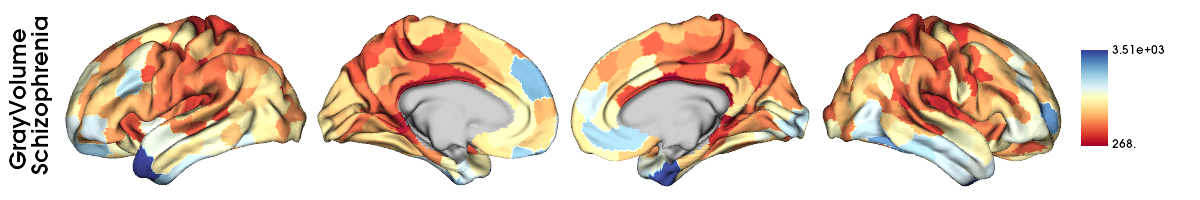

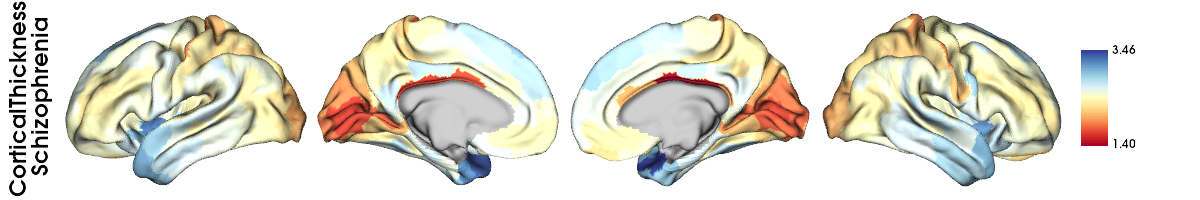

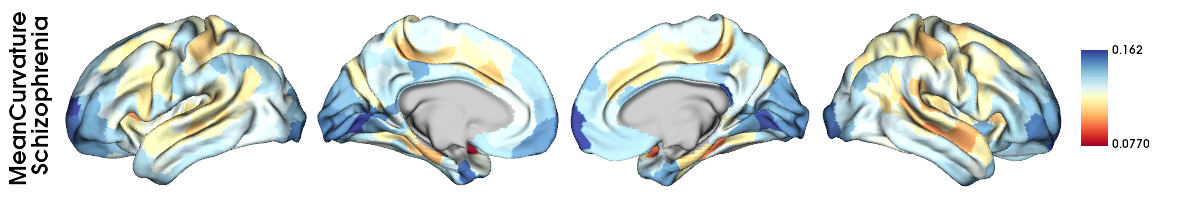

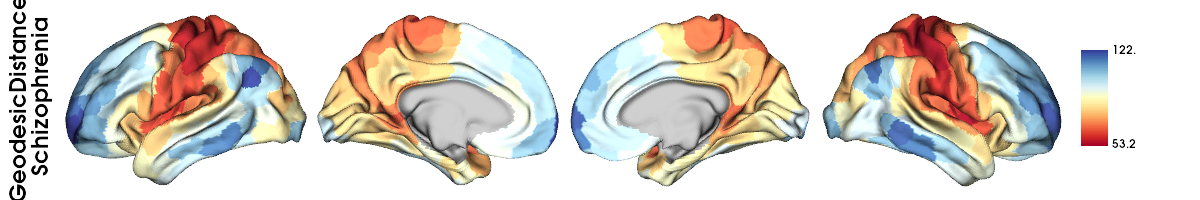

In [47]:
from brainspace.mesh.mesh_io import read_surface
import pandas as pd
import numpy as np
from IPython.display import display

GrayVolume = pd.read_csv('/media/garlicseed/data2/Schizophrenia/morpho_train/combine_data/GV_stack_SCHZ.csv')
Thickness = pd.read_csv('/media/garlicseed/data2/Schizophrenia/morpho_train/combine_data/thick_avg_stack_SCHZ.csv')
Curv = pd.read_csv('/media/garlicseed/data2/Schizophrenia/morpho_train/combine_data/mean_curv_stack_SCHZ.csv')
GD = pd.read_csv('/media/garlicseed/data2/Schizophrenia/morpho_train/combine_data/geodesic_SCHZ.csv')

subj_dir = '/media/garlicseed/data2/Schizophrenia/derivate/micapipe_v0.2.0/'
atlas = 'schaefer-400'
micapipe = '/media/garlicseed/data2/Schizophrenia'

f32k_lh = read_surface(f'{micapipe}/surfaces/fsLR-32k.L.surf.gii', itype='gii')
f32k_rh = read_surface(f'{micapipe}/surfaces/fsLR-32k.R.surf.gii', itype='gii')

from brainstat.datasets import fetch_mask, fetch_template_surface
from brainspace.datasets import load_parcellation
from brainspace.plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels

pial_left, pial_right = fetch_template_surface("fsaverage5", join=False)
pial_combined = fetch_template_surface("fsaverage5", join=True)
mask = fetch_mask("fsaverage5")
labeling = load_parcellation('schaefer', scale=400, join=True)
mask = labeling != 0

morphos = [GrayVolume, Thickness, Curv, GD]
label_text_options = ['GrayVolume\n Schizophrenia', 'CorticalThickness\n Schizophrenia', 'MeanCurvature\n Schizophrenia', 'GeodesicDistance\n Schizophrenia']

handles = []
for i, (morph, label) in enumerate(zip(morphos, label_text_options)):

    mean_values = np.mean(morph, axis=0)

    mapped_data = map_to_labels(mean_values, labeling, mask=mask, fill=np.nan)

    plot_handle = plot_hemispheres(
        f32k_lh, f32k_rh, 
        array_name=mapped_data, 
        embed_nb=True, 
        size=(1200, 200), 
        cmap="RdYlBu", 
        color_bar=True, 
        nan_color=(0.7, 0.7, 0.7, 1),
        label_text=[label], 
        zoom=1.55,
        screenshot=False,
        layout_style = 'row'
    )
    handles.append(plot_handle)
display(*handles)